In [3]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.config import * 
from pythetatools.config_samples import erec_egdes, analysis_type_to_xmax
from pythetatools.config_visualisation import t2k_style, darkblue
from pythetatools.base_visualisation import show_minor_ticks
from pythetatools.file_manager import read_histogram


import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PTGenerateXP output: reading, processing, plotting

The output root file of PTGenerateXP can loaded using function __pythetatools.toyxp.load__.

There are different types (kinds) of ToyXP, for which the loading is different. For that argument __kind__ is introduced:
- __kind='asimov'__ - the asimov datasets will be loaded from the TH histograms e.g. hnumu1R, hnue1R.
- __kind='toy'__ - the toy datasets will be loaded from the ToyXp tree.
- __kind='data'__ - the toy datasets will be loaded from the Data_Tree tree.

Data is loaded is class object __pythetatools.toyxp.ToyXp__ which is a collection of __pythetatools.toyxp.Sample__ or __pythetatools.toyxp.UnbinnedSample__.

In [6]:
filename = "/Users/denis.carabadjac/Python/pythetatools/inputs/ToyXp/ToyXP_00000.root"
asimov = toyxp.load(filename, kind="asimov")
toy = toyxp.load(filename, kind="toy", itoy=1)
toy_unbinned= toyxp.load(filename, kind="toy", itoy=1, tobin=False)
toys = toyxp.load(filename, kind="toy", itoy=1, ntoys=10)
toys_unbinned = toyxp.load(filename, kind="toy", itoy=1, ntoys=10, tobin=False)


In [7]:
print(asimov)

6 samples are included in this toy: 
Title: nue1R; Sample title: nue1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 113.16748176120451
Title: numu1R; Sample title: numu1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 417.2024917961284
Title: nuebar1R; Sample title: nuebar1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 17.624306048442836
Title: numubar1R; Sample title: numubar1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 146.66609212345074
Title: nue1RD; Sample title: nue1RD; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 10.040108925208447
Title: numucc1pi; Sample title: numucc1pi; Dimension: 1; Shape: (73,); Analysis type: Erec Integral: 123.9050076912214


In [8]:
print(toy)

6 samples are included in this toy: 
Title: nue1R; Sample title: nue1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 128.0
Title: numu1R; Sample title: numu1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 365.0
Title: nuebar1R; Sample title: nuebar1R; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 18.0
Title: numubar1R; Sample title: numubar1R; Dimension: 2; Shape: (73, 6); Analysis type: e-theta Integral: 158.0
Title: nue1RD; Sample title: nue1RD; Dimension: 2; Shape: (15, 15); Analysis type: PTheta Integral: 5.0
Title: numucc1pi; Sample title: numucc1pi; Dimension: 1; Shape: (73,); Analysis type: Erec Integral: 135


- ToyXp behaves like a dictionary: you can access the sample from the ToyXp object using a key which is the title of sample
- The sample can be plotted applyting method Sample.plot()


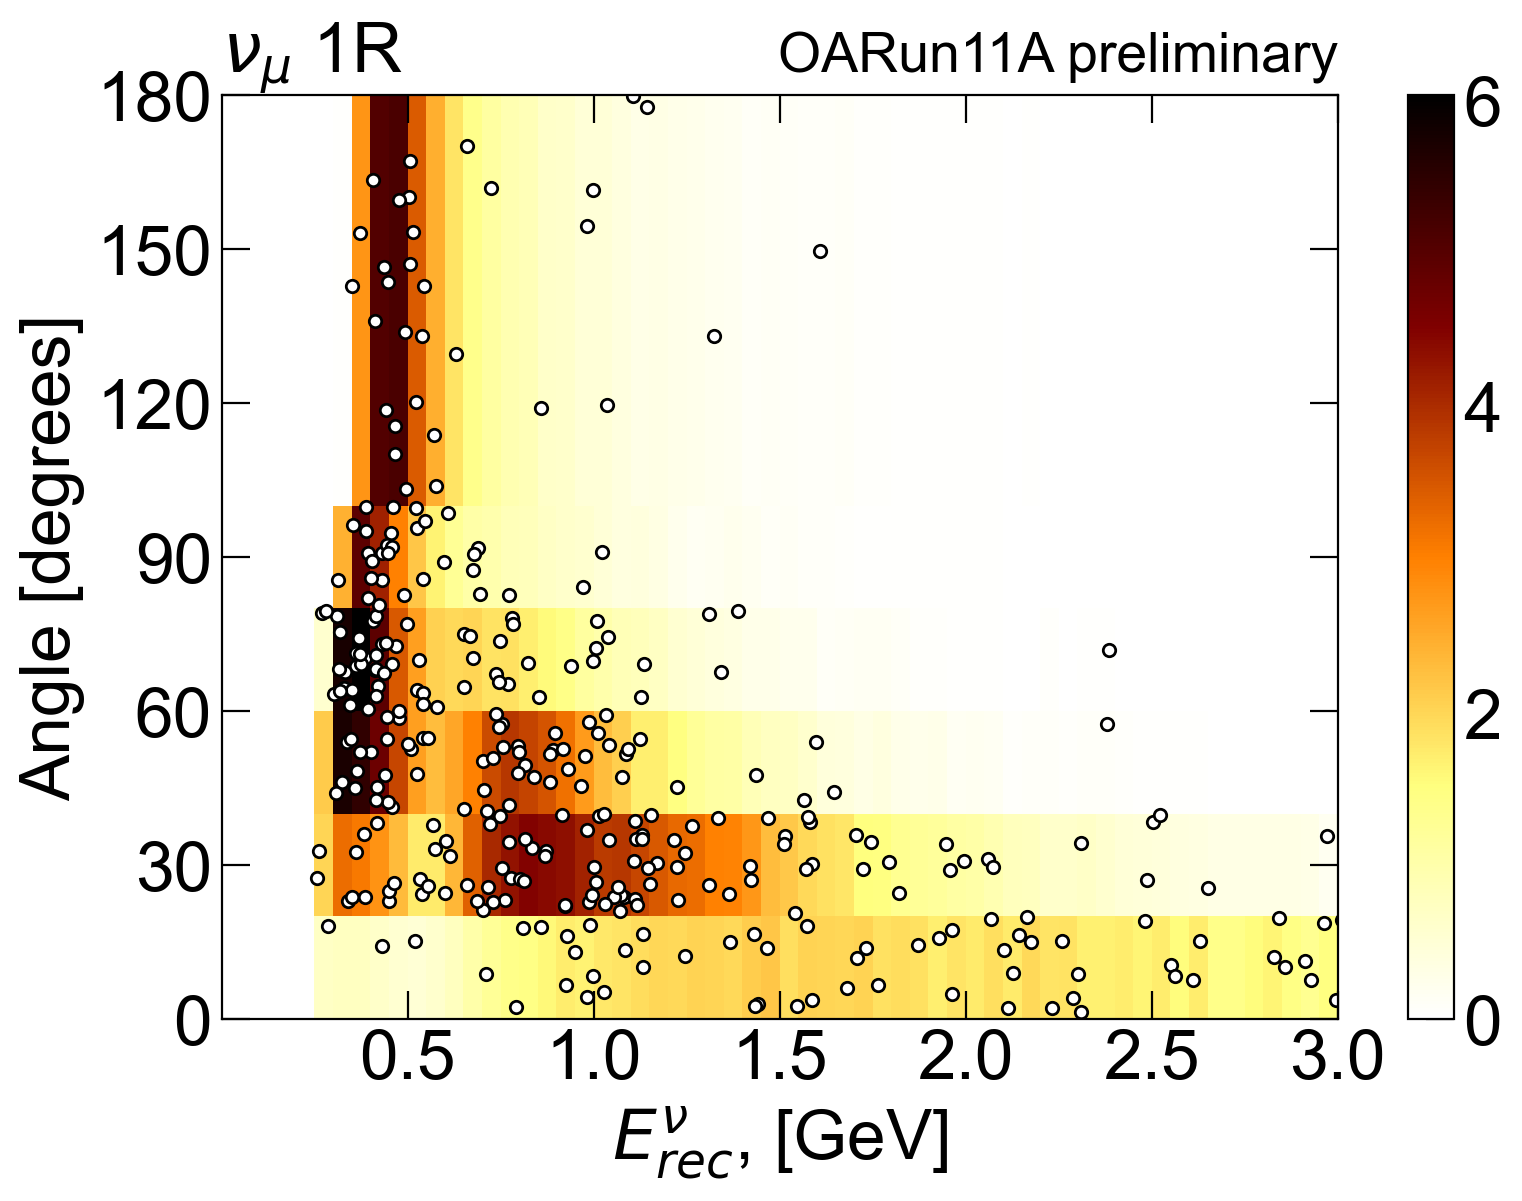

In [9]:
title = 'numu1R'
fig, ax = plt.subplots()
asimov[title].plot(ax, wtag=True)
toys_unbinned[title].plot(ax, wtag=True)

Various functions and operations are defined for Sample objects.

For example,

- Addition, subtraction, multiplication and division between two samples and between sample and a number
- Negation of a sample
- Projection of the 2D samples to one of the axes
- Rebinning of a binned sample
- Slicing of a sample
- Check documentation for others

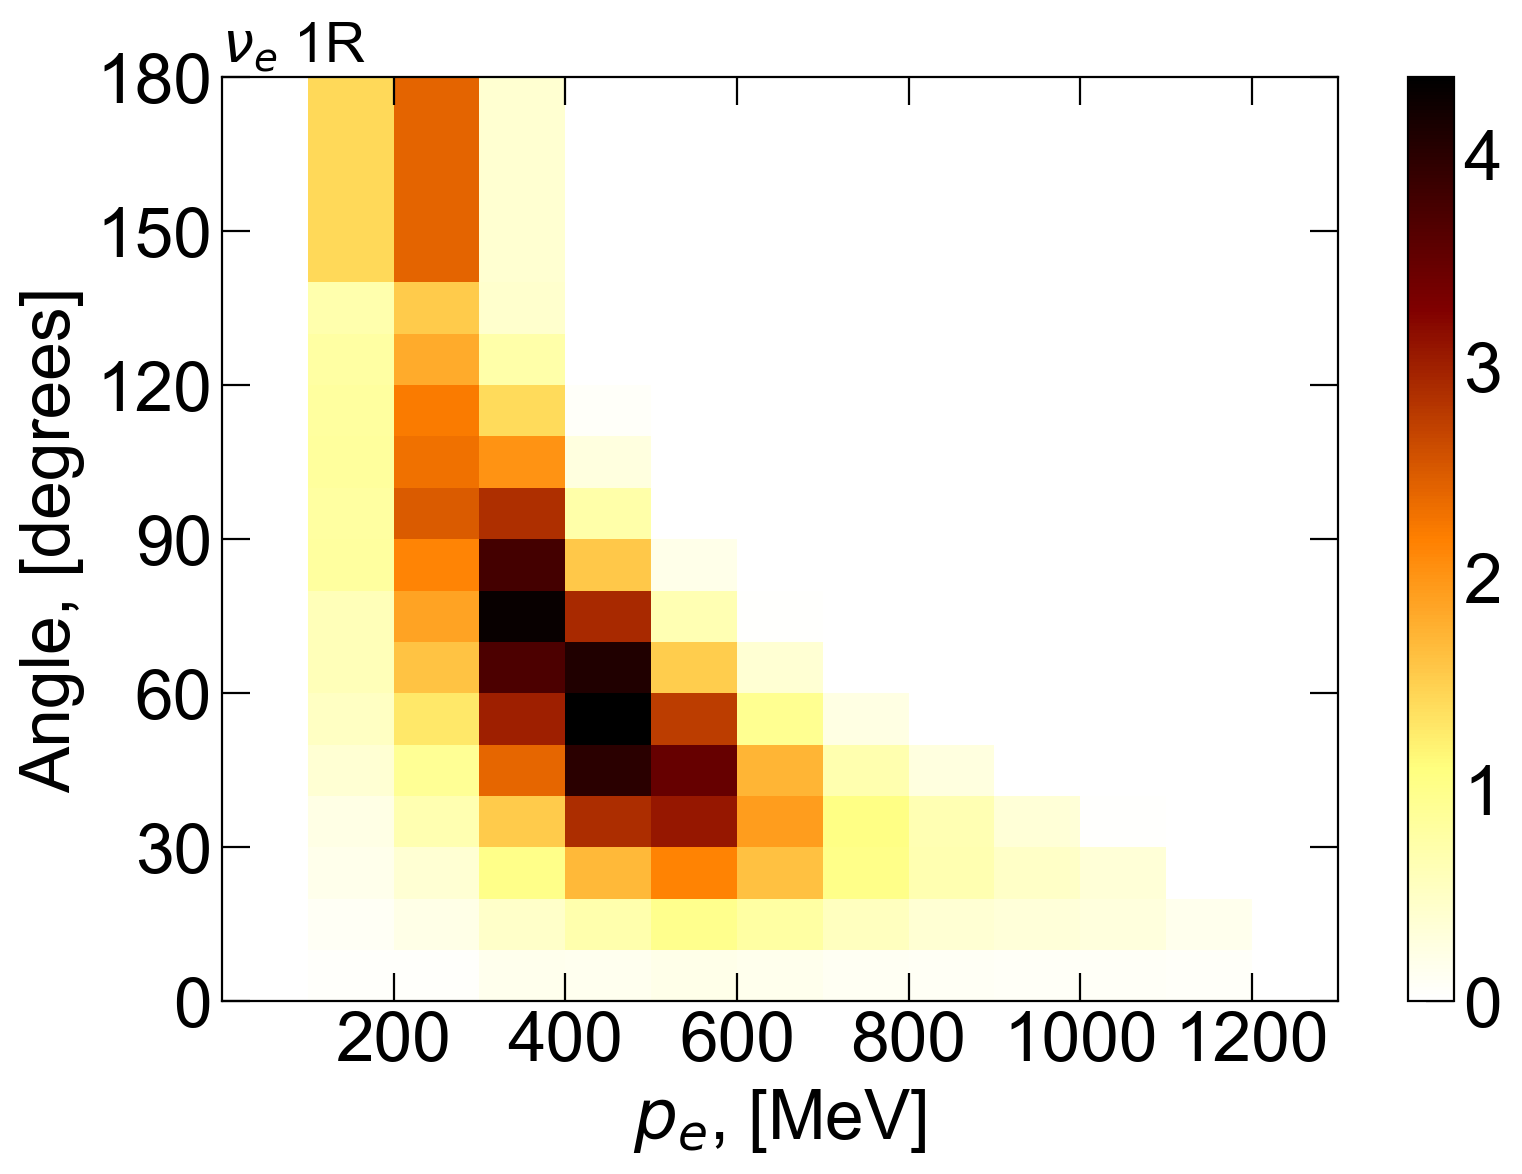

In [10]:
fig, ax = plt.subplots()
sample = asimov['nue1R']

sample.plot(ax)

In [11]:

sample_xproj = sample.project_to_x()

sample_add = 1+sample_xproj+1
sample_multnumber = sample_xproj*2
sample_multsample = 0.02*sample_xproj*sample_add
sample_div = sample_multsample/sample_multnumber
sample_neg = -sample_xproj


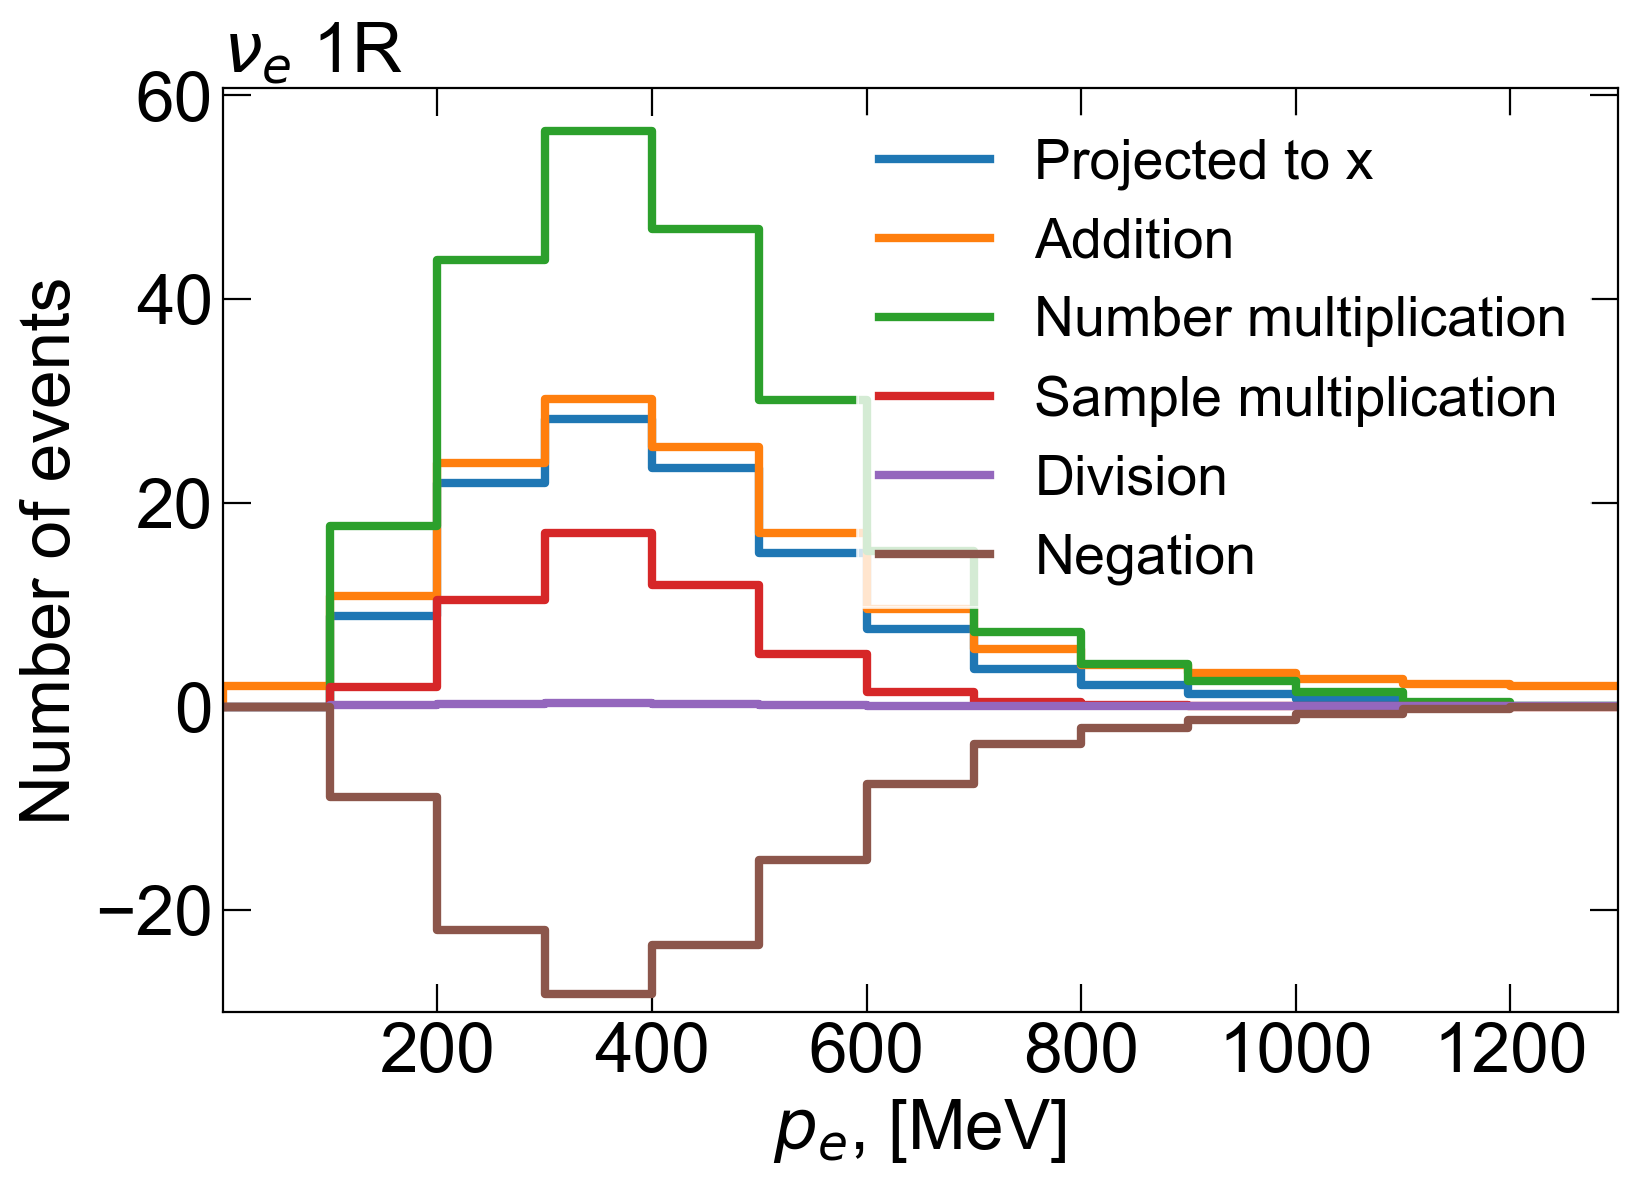

In [12]:
fig, ax = plt.subplots()

sample_xproj.plot(ax, label='Projected to x')
sample_add.plot(ax, label='Addition')
sample_multnumber.plot(ax, label='Number multiplication')
sample_multsample.plot(ax, label='Sample multiplication')
sample_div.plot(ax, label='Division')
sample_neg.plot(ax, label='Negation')

ax.set_ylim(-30)
ax.legend()


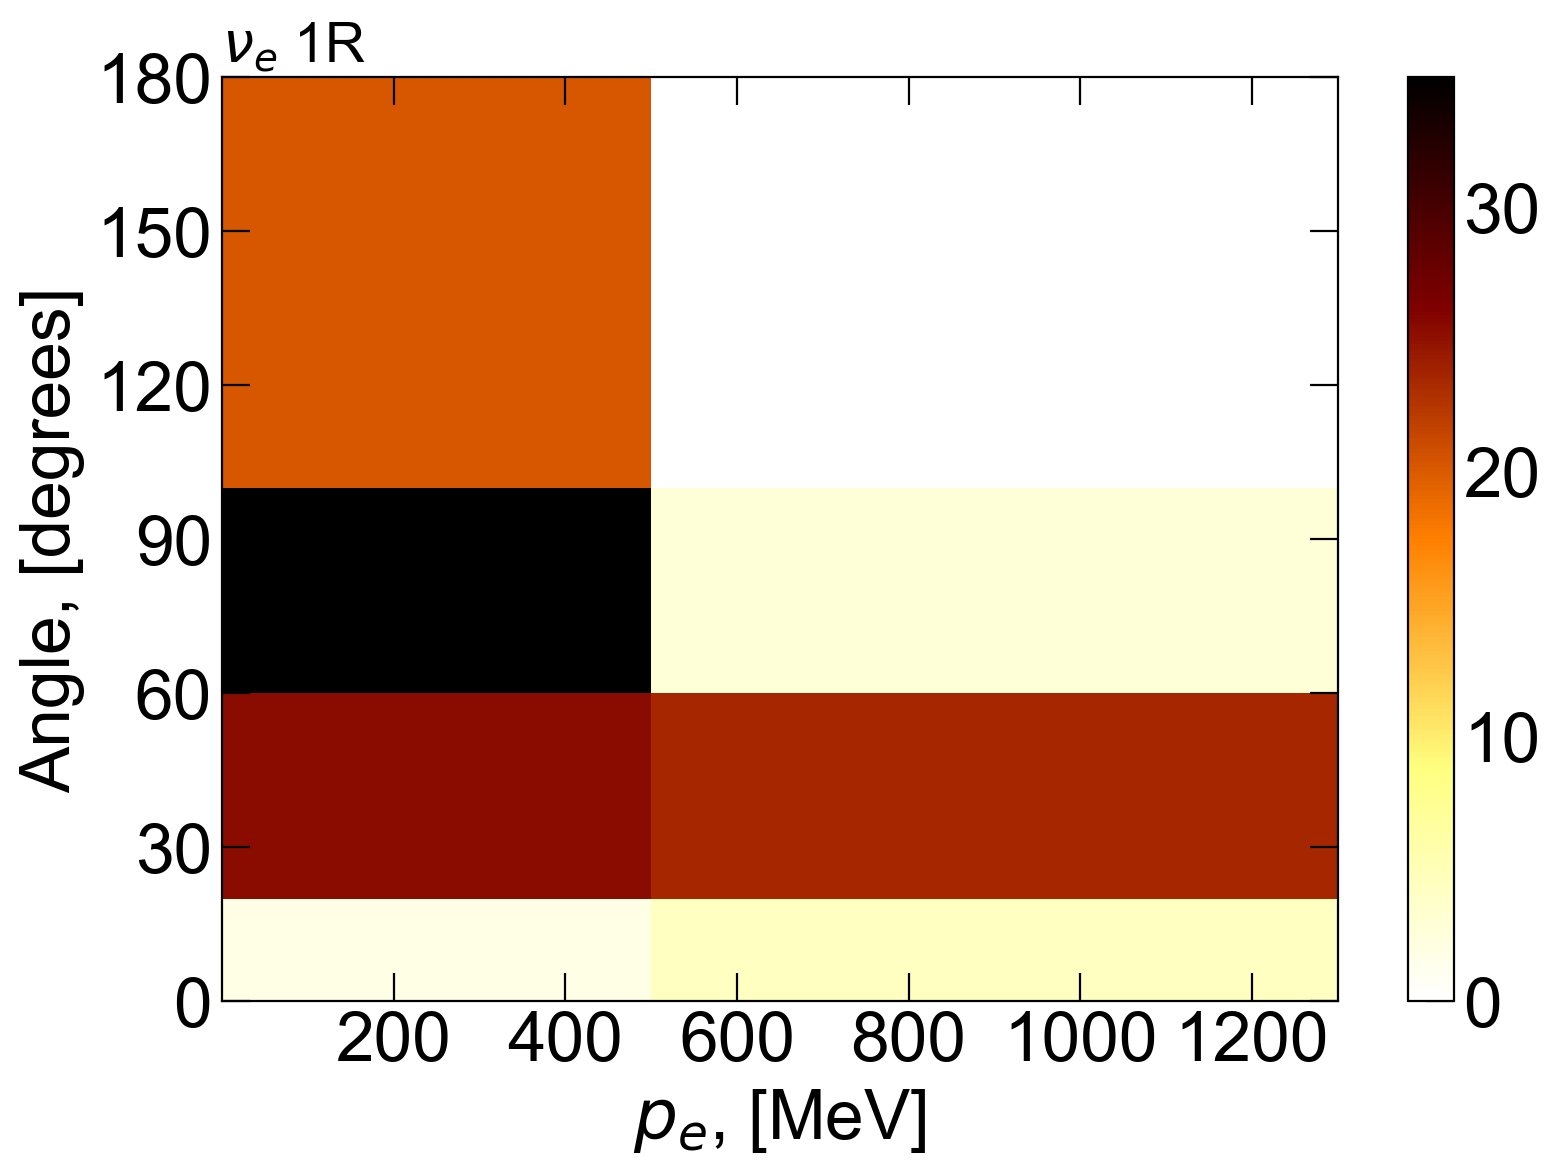

In [13]:
fig, ax = plt.subplots()
sample_rebinned = sample.rebin([np.array([0, 500, 1500]), np.array([0, 20, 60, 100, 180])])

sample_rebinned.plot(ax, wtag=False)


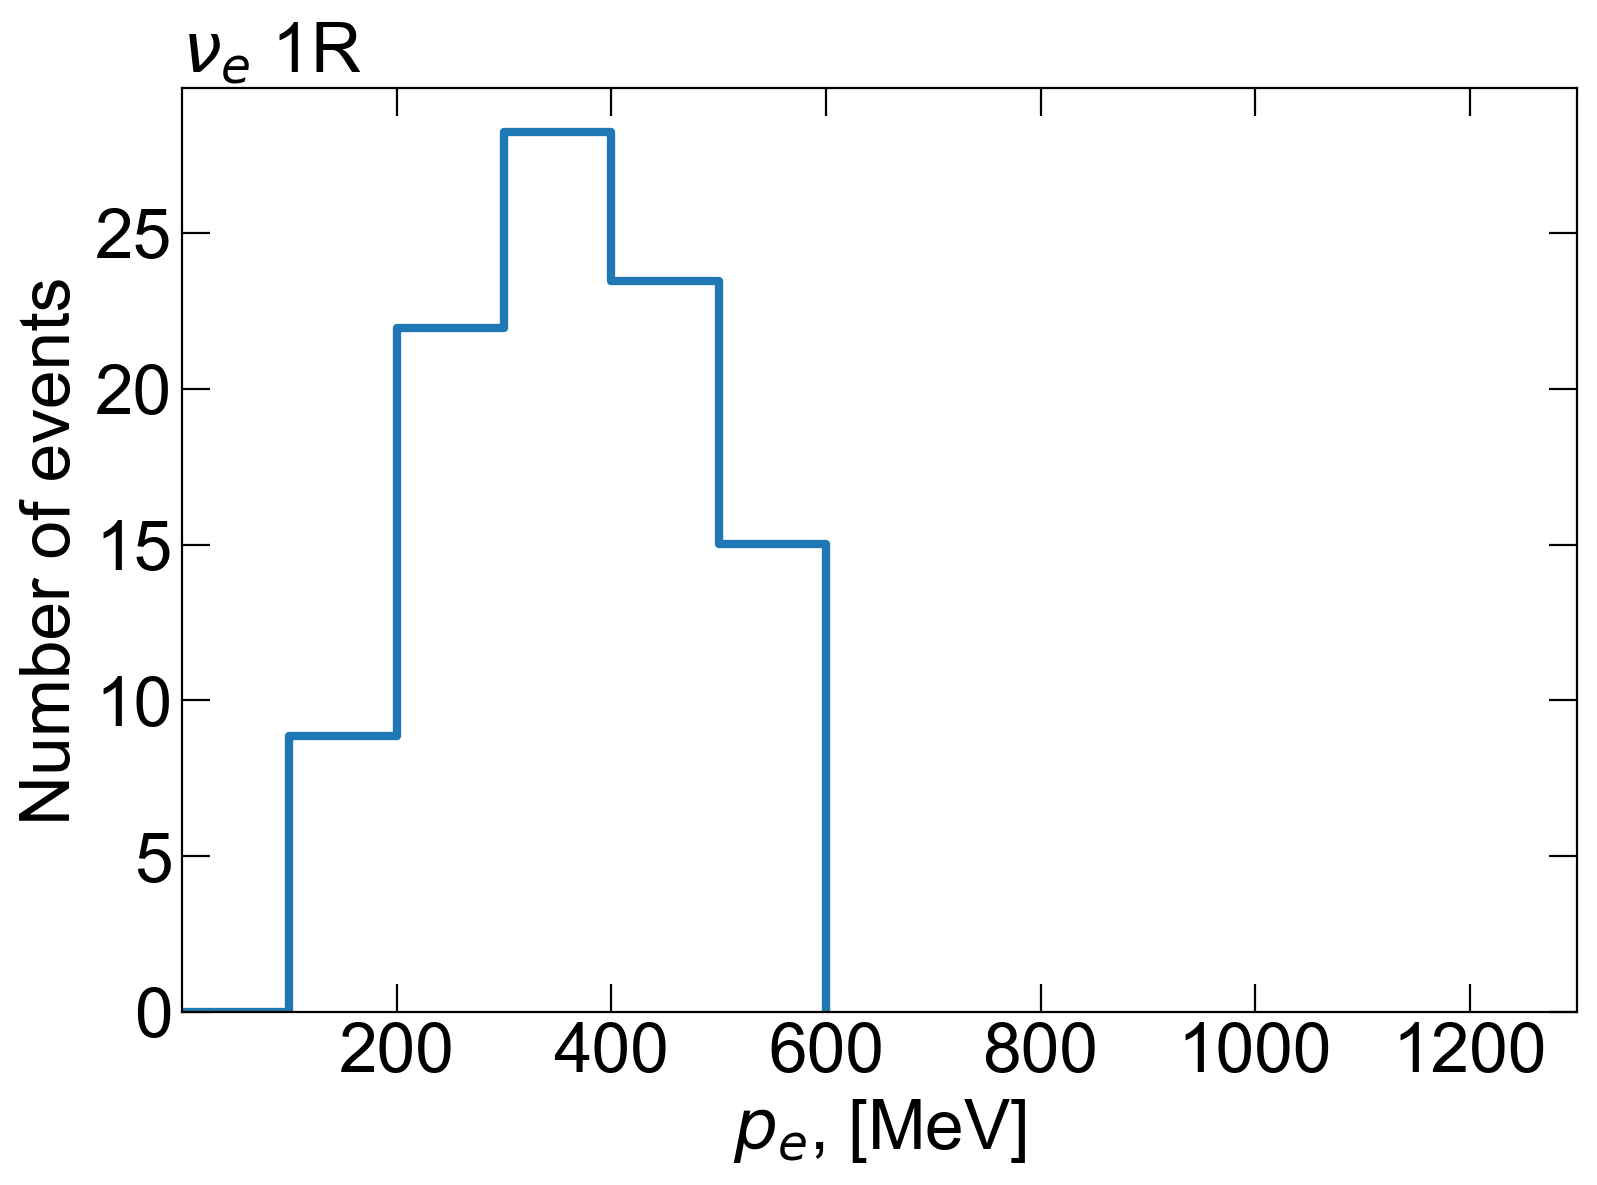

In [14]:
fig, ax = plt.subplots()
sample_slice = sample_xproj.slice(0, 600)
sample_slice.plot(ax, wtag=False)

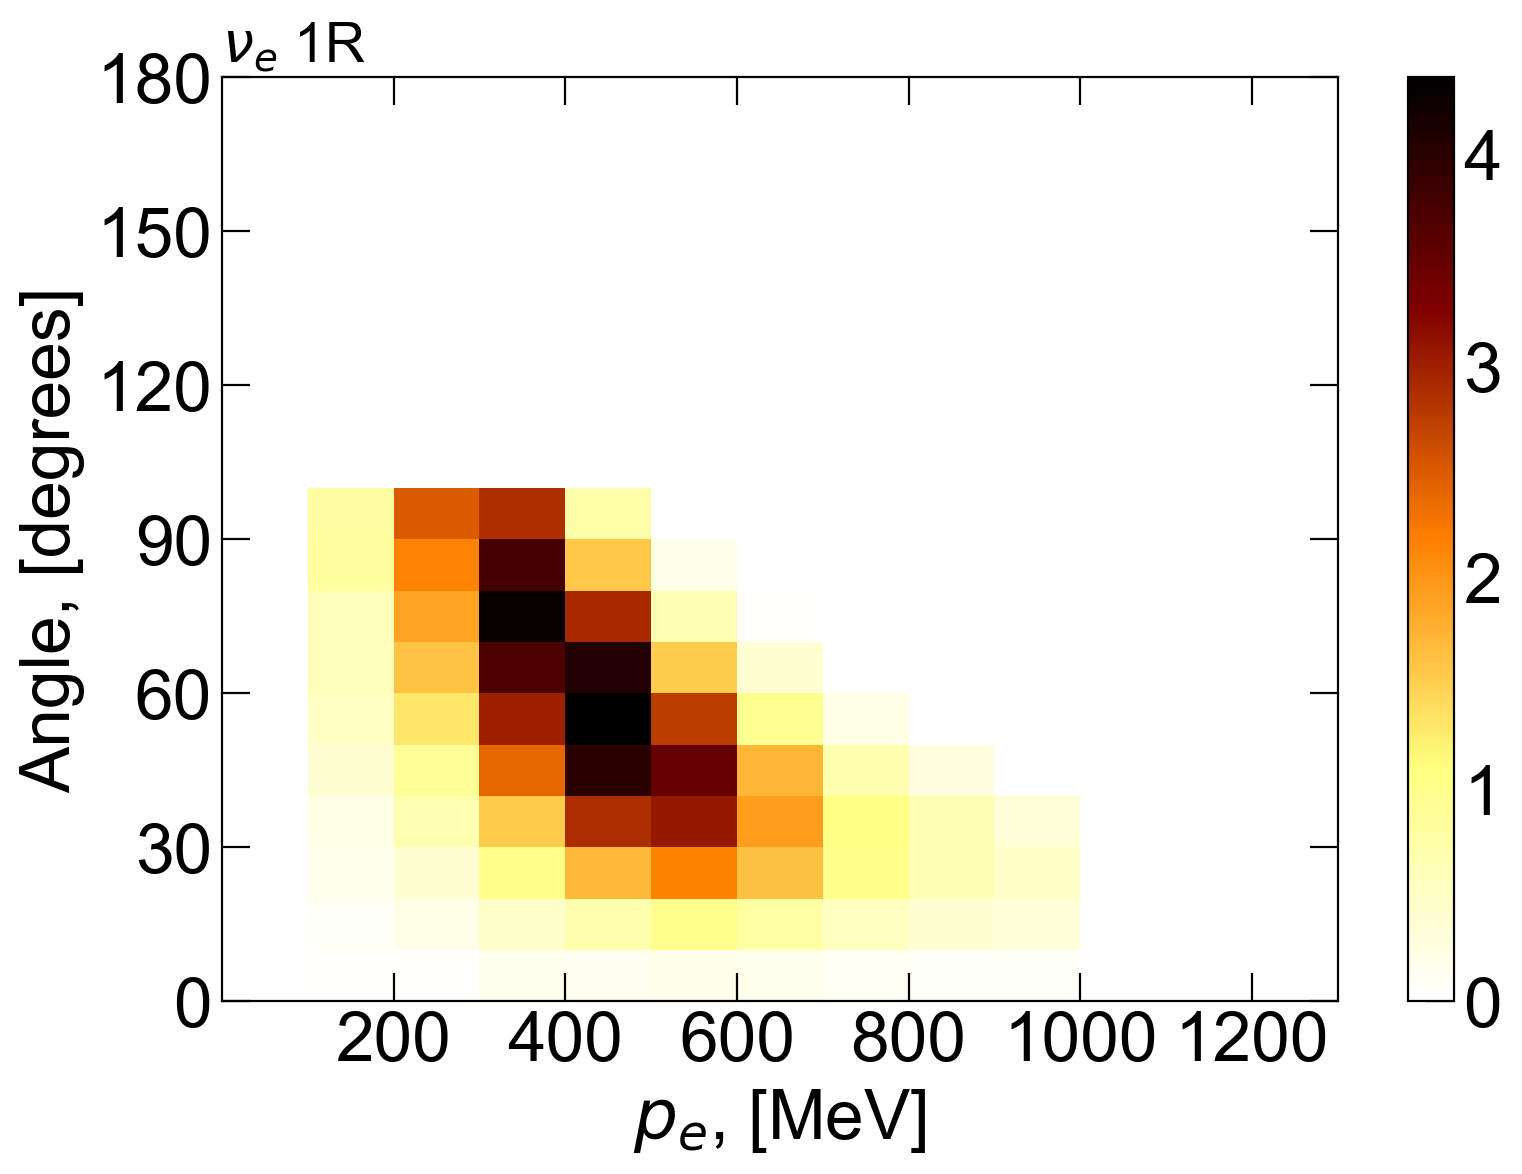

In [15]:
fig, ax = plt.subplots()
sample_slice = sample.slice(0, 1000, 0, 100)
sample_slice.plot(ax, wtag=False)

Instead of loading a sample/toy from the PTGenerateXP output it can be initialised setting bin edges and bin content

In [16]:
bin_edges = [0, 10, 20, 100]
z = [10, 20, 30]
sample_test = toyxp.Sample([bin_edges], z)

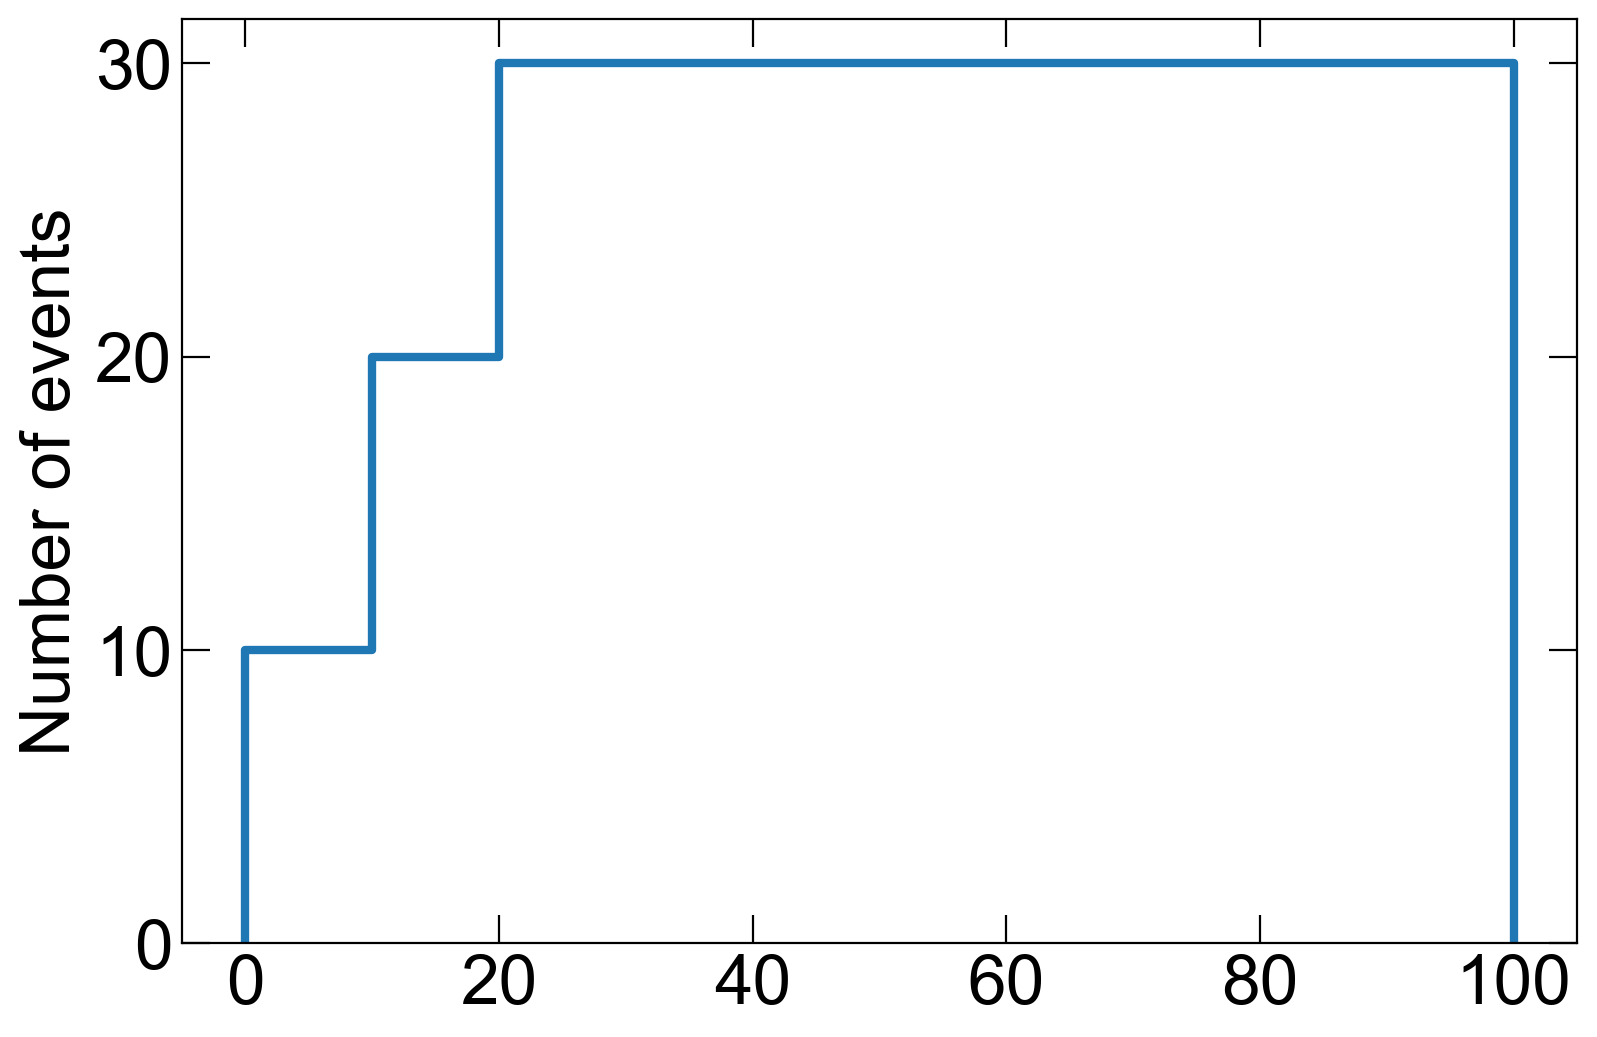

In [17]:
fig, ax = plt.subplots()
sample_test.plot(ax)

In [37]:
file_pattern = f"{inputs_dir}/MargTemplates/MargTemplates_100k_AsimovA22deltaneg025pi_delta_script_320kA_cycles5_ratio3_Ptheta_\
OA2024_flux_covariance_23av1_banff_default_mode_0_woRC_merged.root"
grid, avnllh, param_name = pythetatools.likelihood.load(file_pattern)
llh = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')


Number of entries in 'MargTemplate': 102.
Grid sizes: [51] for parameters ['delta']


In [38]:
avnllh[0][0]

array([12.54906937, 12.34325081, 12.17777177, 12.05215577, 11.96354957,
       11.90707943, 11.87634763, 11.86401151, 11.86239936, 11.86412863,
       11.8626952 , 11.853001  , 11.83178569, 11.79792952, 11.7526006 ,
       11.69922927, 11.64330469, 11.59200132, 11.5536554 , 11.53712247,
       11.55105875, 11.60318121, 11.69957407, 11.84411635, 12.03809414,
       12.28002577, 12.56568105, 12.88824899, 13.2386197 , 13.60577236,
       13.97726652, 14.33982065, 14.67995238, 14.9846547 , 15.24207988,
       15.44219155, 15.57733324, 15.64266078, 15.63639946, 15.55990946,
       15.41756307, 15.21644625, 14.96589841, 14.6769119 , 14.36143798,
       14.03168538, 13.69951471, 13.37598852, 13.07104189, 12.79317095,
       12.54906937])

(<matplotlib.legend.Legend at 0x1547f2d60>, None)

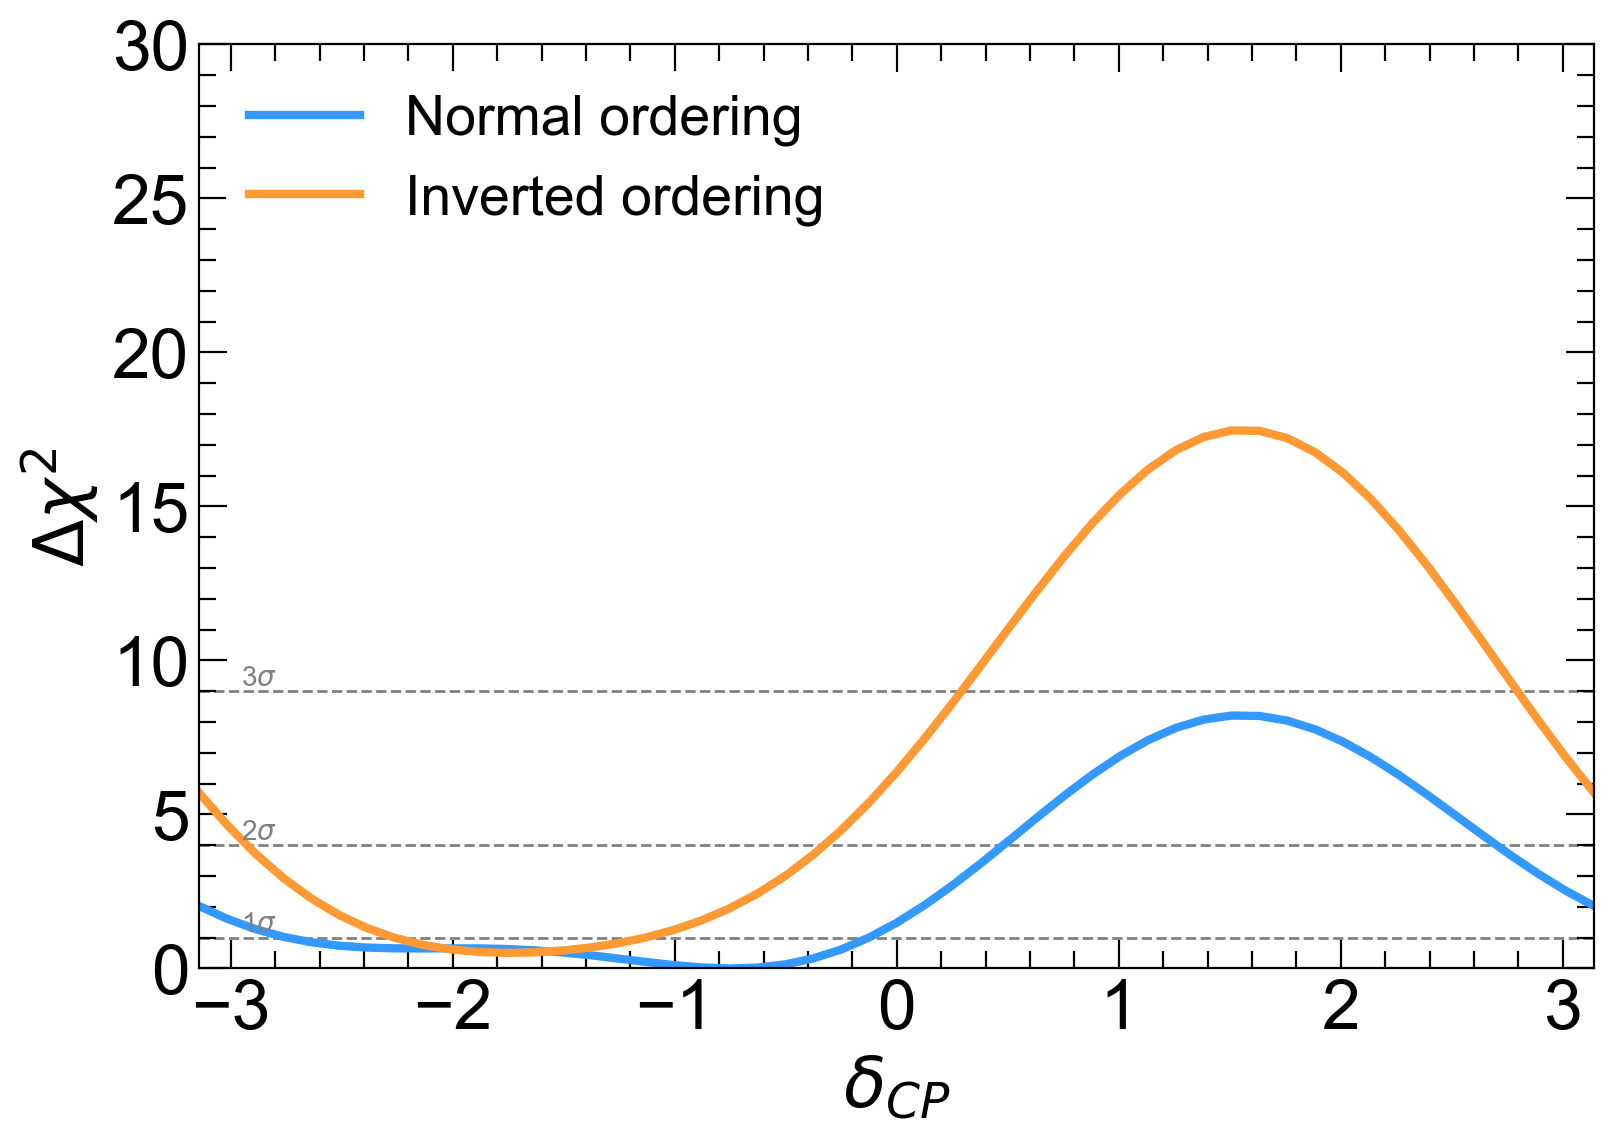

In [39]:
fig, ax = plt.subplots()
llh.plot(ax, mo='both')

In [59]:
file_pattern = f"{inputs_dir}/MargTemplates/MargTemplates_OA2023_sin223_dm2_100k_e-theta_AsimovA22_NO_mode_0/m*.root"
grid, avnllh, param_name = likelihood.load(file_pattern, mo=0)
llh = likelihood.Loglikelihood(grid, avnllh, param_name)

Number of entries in 'MargTemplate': 3321.
Grid sizes: [41, 81] for parameters ['dm2', 'sin223']
[54] [21]


In [63]:
contour_kwargs = {
}

scatter_kwargs = {
    's': 100,
}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(<matplotlib.legend.Legend at 0x152200f70>,
 <matplotlib.legend.Legend at 0x152244070>)

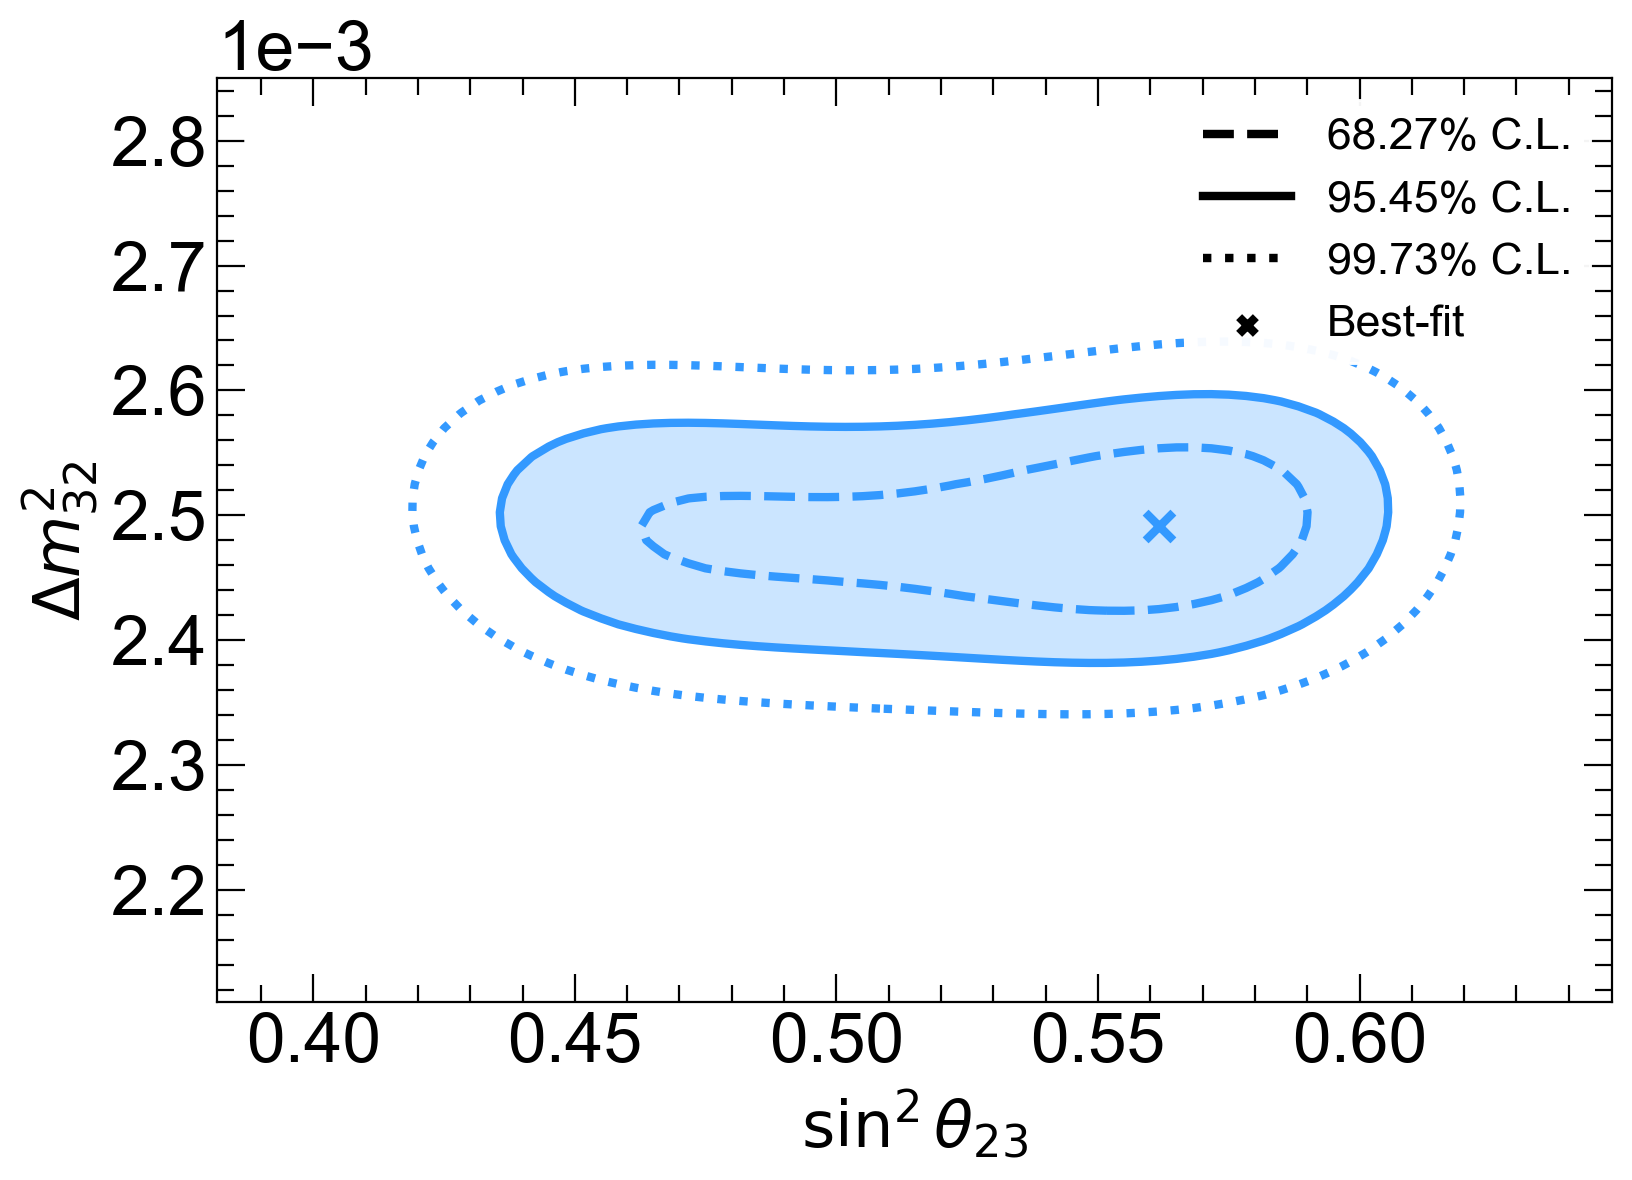

In [64]:
fig, ax = plt.subplots()
llh.plot(ax, show_map=False, mo=0, cls=['1sigma', '2sigma', '3sigma'], contour_kwargs=contour_kwargs, scatter_kwargs=scatter_kwargs)
